In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras import models,layers

In [9]:
IMAGE_SIZE=224
BATCH_SIZE=12
CHANNELS=3
EPOCHS=20

data_set=tf.keras.preprocessing.image_dataset_from_directory(
    'D:\data science projects\Black fungus project\Black Fungus data',
    shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 182 files belonging to 2 classes.


In [19]:
# 70 % train, 30% --> 10% test 20% val

train_size=0.7     

len(data_set)*train_size

11.2

In [20]:
train_ds=data_set.take(11)

In [21]:
test_ds=data_set.skip(11)    # not exactly test_ds
len(test_ds)

5

In [22]:
val_size=0.2
len(data_set)*val_size

3.2

In [23]:
val_ds = test_ds.take(3)

In [24]:
test_ds = test_ds.skip(3) 

len(test_ds)

2

In [10]:
IMAGE_SIZE = [224, 224]

from tensorflow.keras.applications.vgg19 import VGG19

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [11]:
for layer in mobilnet.layers:
    layer.trainable = False

In [12]:
from glob import glob

folders = glob('D:\data science projects\Black fungus project\Black Fungus data/*')

folders

['D:\\data science projects\\Black fungus project\\Black Fungus data\\Fungus',
 'D:\\data science projects\\Black fungus project\\Black Fungus data\\Normal']

In [15]:
x = Flatten()(mobilnet.output)

In [16]:
from tensorflow.keras.models import Model

prediction = Dense(len(folders), activation='softmax')(x)

tl_model = Model(inputs=mobilnet.input, outputs=prediction)

In [17]:
tl_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
tl_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history=tl_model.fit(
    train_ds,
     
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    
    validation_data=val_ds
    
)

Epoch 1/20
11/11 [==============================] - 91s 8s/step - loss: 9.6758 - accuracy: 0.6591 - val_loss: 0.7415 - val_accuracy: 0.8889
Epoch 2/20
11/11 [==============================] - 89s 8s/step - loss: 0.8328 - accuracy: 0.9697 - val_loss: 1.2631 - val_accuracy: 0.9167
Epoch 3/20
11/11 [==============================] - 90s 8s/step - loss: 1.0761 - accuracy: 0.9545 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4/20
11/11 [==============================] - 88s 8s/step - loss: 0.1373 - accuracy: 0.9924 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
11/11 [==============================] - 92s 9s/step - loss: 1.6156e-06 - accuracy: 1.0000 - val_loss: 5.2982e-08 - val_accuracy: 1.0000
Epoch 6/20
11/11 [==============================] - 94s 9s/step - loss: 0.0055 - accuracy: 0.9924 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
11/11 [==============================] - 88s 8s/step - loss: 2.8822e-06 - accuracy: 1.0000 - val_loss: 6.5260e-04 - val_accuracy: 1.0

In [26]:
scores=tl_model.evaluate(test_ds)

2/2 [==============================] - 8s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [38]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

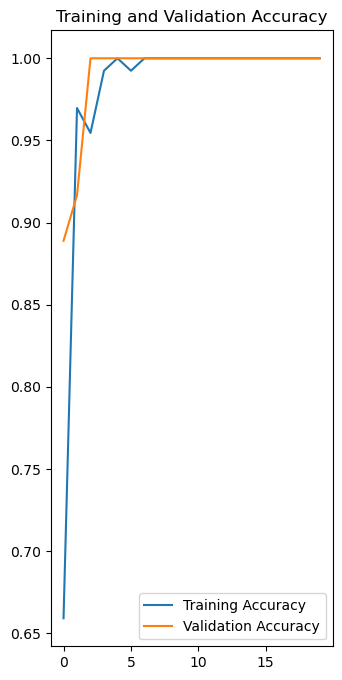

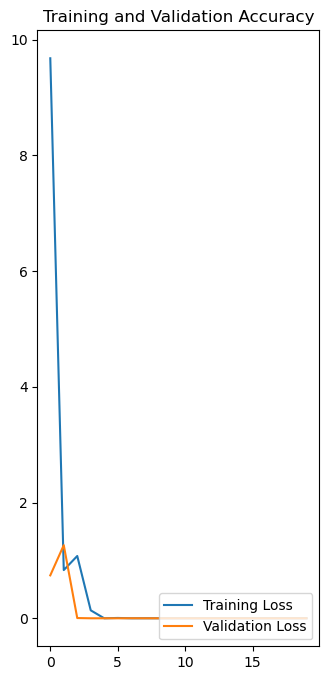

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

In [30]:
class_names=data_set.class_names
class_names

['Fungus', 'Normal']

first image to prdict
actual label :  Fungus
predicted label :  Fungus


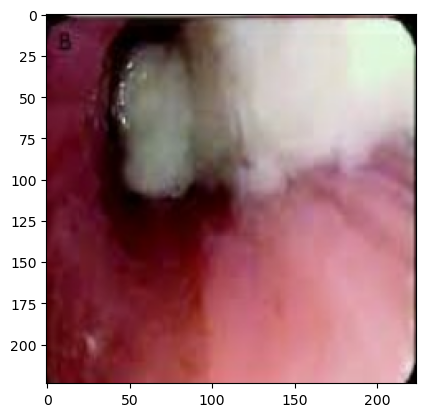

In [32]:
for images_batch,labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('first image to prdict')
    plt.imshow(first_image)
    print('actual label : ',class_names[first_label])
    
    batch_prediction = tl_model.predict([images_batch])
    print('predicted label : ',class_names[np.argmax(batch_prediction[0])])
    plt.show()

In [33]:
def predict(model,img):
    
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = tl_model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

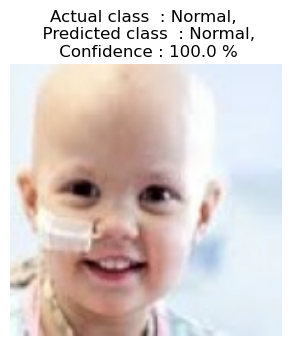

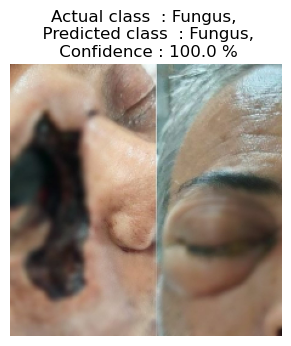

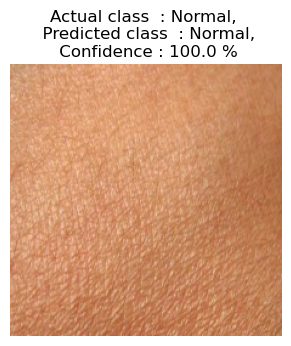

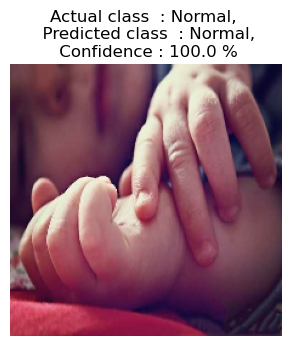

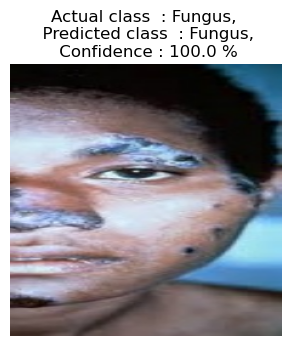

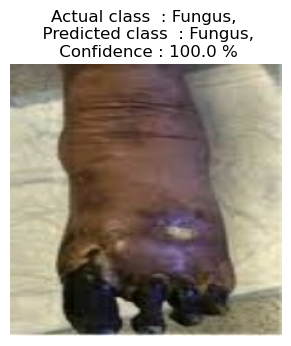

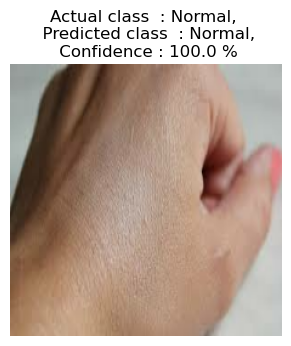

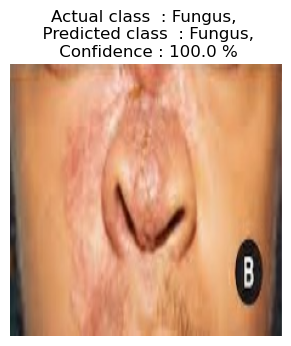

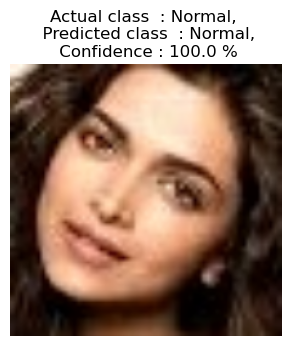

In [36]:
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.figure(figsize=(12,12))
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence = predict(tl_model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual class  : {actual_class}, \n  Predicted class  : {predicted_class}, \n Confidence : {confidence} %")
        plt.axis('off')
        plt.show()

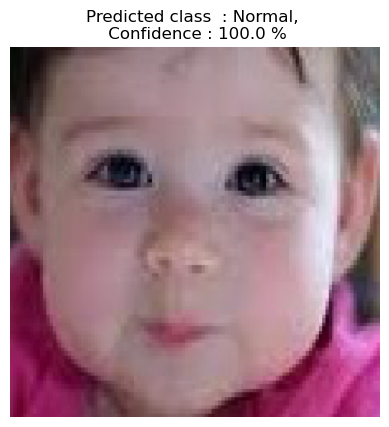

In [41]:
img_path='D:\data science projects\Black fungus project\Images\C_Normal.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

predicted_class,confidence = predict(tl_model,img_preprocessed)

plt.imshow(img)
plt.title(f"Predicted class  : {predicted_class}, \n Confidence : {confidence} %")
plt.axis('off')
plt.show()

In [37]:
tl_model_version=1
tl_model.save(f"./models/{tl_model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets
